In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
pd.set_option('display.max_rows', None) # display all rows 
#warnings.filterwarnings('ignore') # ignore warnings



In [2]:
# 🔧 Basic functions
def open_data(data): # returns shape, data types & shows a small sample
    print(f"Data shape is {data.info()}.\n")
    return data.sample(5)

def clean_columns(data): # clean columns names
    data.columns = [column.lower().replace(' ', '_') for column in data.columns]
    return data.sample(0)

def explore_data(data): # sum & returns duplicates, NaN & empty spaces added a table with percentage missing
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()
    exploration = pd.DataFrame({"NaN": nan_values, "EmptySpaces": empty_spaces}) # New dataframe with the results
    print(f"There are {data.duplicated().sum()} duplicate rows. Also;")
    nulls = pd.DataFrame(data.isna().sum()*100/len(data), columns=['percentage'])
    nulls.sort_values('percentage', ascending = False)
    print(nulls)
    return exploration

In [3]:
df_1=pd.read_csv('D:\Ironhack\datos_proyecto\eurostat\estat_urb_clma_en.csv')  
df_1=df_1.pivot(index=['cities','TIME_PERIOD'],columns='indic_ur',values='OBS_VALUE')
df_1=df_1.reset_index()

In [4]:
df_1.head(4)

indic_ur,cities,TIME_PERIOD,EC1001I,EC1002I,EC1002V,EC1003I,EC1003V,EC1010V,EC1011I,EC1011V,EC1012I,EC1012V,EC1020I,EC1145V,EC1146V,EC1147V,EC1174V,EC1175V,EC1176V,EC1177V,EC1178V,EC1179V,EC1180V,EC1181V,EC1182V,EC2008V,EC2009V,EC2020V,EC2022V,EC2032V,EC2033V,EC2034V,EC2035V,EC2036V,EC2037V,EC2038V
0,AT,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690300.0,826300.0,3949300.0,269000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,671500.0,804500.0,3957000.0,278500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT,1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,654000.0,772800.0,3931500.0,278800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,632000.0,752000.0,3925800.0,288500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       11394 non-null  object 
 1   TIME_PERIOD  11394 non-null  int64  
 2   EC1001I      4814 non-null   float64
 3   EC1002I      4642 non-null   float64
 4   EC1002V      7641 non-null   float64
 5   EC1003I      4640 non-null   float64
 6   EC1003V      7637 non-null   float64
 7   EC1010V      8552 non-null   float64
 8   EC1011I      6083 non-null   float64
 9   EC1011V      9023 non-null   float64
 10  EC1012I      6038 non-null   float64
 11  EC1012V      8955 non-null   float64
 12  EC1020I      6482 non-null   float64
 13  EC1145V      5342 non-null   float64
 14  EC1146V      5021 non-null   float64
 15  EC1147V      5020 non-null   float64
 16  EC1174V      5755 non-null   float64
 17  EC1175V      5719 non-null   float64
 18  EC1176V      5719 non-null   float64
 19  EC11

In [6]:
columns = df_1.columns
subsets = df_1['cities'].unique()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=columns)

# Loop through each subset (category) in cities
for subset in subsets:
    subset_data = df_1[df_1['cities'] == subset]
    subset_values = {}

    # Loop through each column
    for column in columns:
        column_values = subset_data[column]

        # Find the first non-null value
        first_non_null = column_values.dropna().iloc[0] if not column_values.isnull().all() else None

        # Store the first non-null value for the column
        subset_values[column] = first_non_null

    # Convert the subset_values dictionary to a DataFrame
    subset_df = pd.DataFrame(subset_values, index=[0])

    # Concatenate the subset DataFrame to the result DataFrame
    result_df = pd.concat([result_df, subset_df], ignore_index=True)


In [7]:
result_df.head(10)

,cities,TIME_PERIOD,EC1001I,EC1002I,EC1002V,EC1003I,EC1003V,EC1010V,EC1011I,EC1011V,EC1012I,EC1012V,EC1020I,EC1145V,EC1146V,EC1147V,EC1174V,EC1175V,EC1176V,EC1177V,EC1178V,EC1179V,EC1180V,EC1181V,EC1182V,EC2008V,EC2009V,EC2020V,EC2022V,EC2032V,EC2033V,EC2034V,EC2035V,EC2036V,EC2037V,EC2038V
0,AT,1991,58.0,66.0,2171000.0,50.0,1671000.0,167000.0,4.0,85000.0,5.0,82000.0,4.0,235000.0,158000.0,76000.0,4121586.0,2170661.0,1950925.0,3839979.0,2024918.0,1815061.0,456383.0,262676.0,193707.0,690300.0,826300.0,3949300.0,269000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT001C,1994,62.0,71.0,424457.0,54.0,367543.0,87387.0,5.0,19377.0,5.0,17275.0,11.0,66627.0,45515.0,21112.0,848834.0,439407.0,409427.0,752814.0,386365.0,366449.0,84191.0,46587.0,37604.0,3957.0,86035.0,674886.0,39736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT002C,1999,58.0,67.0,59827.0,50.0,52797.0,8764.0,8.0,4833.0,7.0,3931.0,8.0,8376.0,5573.0,2803.0,129282.0,67530.0,61752.0,118743.0,61697.0,57046.0,12627.0,6942.0,5685.0,1435.0,24660.0,120943.0,6545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT003C,1999,58.0,67.0,49372.0,51.0,42926.0,6438.0,7.0,3650.0,6.0,2788.0,7.0,5891.0,4095.0,1816.0,93253.0,48639.0,44614.0,86530.0,44947.0,41583.0,9424.0,5377.0,4047.0,458.0,19051.0,122420.0,7981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT004C,2001,55.0,133.0,74564.0,50.0,33876.0,2840.0,6.0,4498.0,4.0,1239.0,4.0,7401.0,4180.0,3221.0,68916.0,34921.0,33995.0,64730.0,32602.0,32128.0,8393.0,4497.0,3896.0,None,None,111666.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AT005C,2001,55.0,127.0,57189.0,50.0,26920.0,2340.0,6.0,3330.0,4.0,948.0,4.0,5451.0,2993.0,2458.0,58335.0,29763.0,28572.0,54759.0,27709.0,27050.0,6184.0,3297.0,2887.0,None,None,97797.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AT006C,2013,59.0,65.0,24817.0,55.0,24395.0,4368.0,10.0,2397.0,8.0,1971.0,9.0,5812.0,3341.0,2471.0,46516.0,23265.0,23251.0,42465.0,21062.0,21403.0,5390.0,3060.0,2330.0,None,None,71791.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,BE,1991,52.0,60.0,2400000.0,45.0,1598000.0,279000.0,5.0,109000.0,11.0,170000.0,7.0,251000.0,190000.0,62000.0,4713714.0,2551238.0,2162476.0,4327200.0,2373099.0,1980114.0,554062.0,327923.0,226139.0,93000.0,790500.0,3720266.0,213800.0,957781.0,109539.0,141332.0,24909.0,565822.0,1402259.0,195007.0
8,BE001C,1991,48.0,57.0,196278.0,41.0,166007.0,54871.0,13.0,25624.0,18.0,29157.0,18.0,37514.0,21841.0,15674.0,445418.0,247268.0,198150.0,354554.0,198850.0,160773.0,42780.0,23525.0,19255.0,363.0,59686.0,554744.0,17408.0,127234.0,34686.0,63867.0,5911.0,107751.0,241329.0,42005.0
9,BE002C,1991,49.0,59.0,112238.0,41.0,76979.0,22475.0,9.0,10083.0,16.0,12392.0,12.0,17308.0,10969.0,6339.0,202697.0,113597.0,89100.0,179847.0,102713.0,79525.0,21574.0,12824.0,8750.0,172.0,52455.0,242230.0,7063.0,67522.0,7084.0,11171.0,1975.0,49738.0,73575.0,12570.0


In [8]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cities       907 non-null    object
 1   TIME_PERIOD  907 non-null    object
 2   EC1001I      796 non-null    object
 3   EC1002I      815 non-null    object
 4   EC1002V      842 non-null    object
 5   EC1003I      818 non-null    object
 6   EC1003V      842 non-null    object
 7   EC1010V      906 non-null    object
 8   EC1011I      834 non-null    object
 9   EC1011V      904 non-null    object
 10  EC1012I      836 non-null    object
 11  EC1012V      903 non-null    object
 12  EC1020I      811 non-null    object
 13  EC1145V      836 non-null    object
 14  EC1146V      815 non-null    object
 15  EC1147V      815 non-null    object
 16  EC1174V      748 non-null    object
 17  EC1175V      746 non-null    object
 18  EC1176V      746 non-null    object
 19  EC1177V      766 non-null    

In [9]:
columns_to_convert = result_df.columns[2:]  # Select columns from the third column (index 2) onwards
result_df[columns_to_convert] = result_df[columns_to_convert].astype(float)

In [10]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cities       907 non-null    object 
 1   TIME_PERIOD  907 non-null    object 
 2   EC1001I      796 non-null    float64
 3   EC1002I      815 non-null    float64
 4   EC1002V      842 non-null    float64
 5   EC1003I      818 non-null    float64
 6   EC1003V      842 non-null    float64
 7   EC1010V      906 non-null    float64
 8   EC1011I      834 non-null    float64
 9   EC1011V      904 non-null    float64
 10  EC1012I      836 non-null    float64
 11  EC1012V      903 non-null    float64
 12  EC1020I      811 non-null    float64
 13  EC1145V      836 non-null    float64
 14  EC1146V      815 non-null    float64
 15  EC1147V      815 non-null    float64
 16  EC1174V      748 non-null    float64
 17  EC1175V      746 non-null    float64
 18  EC1176V      746 non-null    float64
 19  EC1177V 

In [11]:
nulls = pd.DataFrame(result_df.isna().sum()*100/len(result_df), columns=['percentage'])
nulls.sort_values('percentage', ascending = False)

,percentage
EC1176V,17.750827
EC1175V,17.750827
EC1174V,17.530320
EC1182V,16.427784
EC1181V,16.427784
EC2008V,16.317530
EC1177V,15.545755
EC1179V,15.214994
EC1178V,15.214994
EC1180V,15.104741


In [12]:
#Third part of dictionary 
df_headers=pd.read_excel(r'D:\Ironhack\datos_proyecto\eurostat\more columns.xlsx',sheet_name='urb_llma')  
df_headers=df_headers.drop(columns=['Unnamed: 0'])
rename={'code':'Column Name','description':'label'}
df_headers = df_headers.rename(columns=rename)
dictionary_df=df_headers
#dictionary_df=pd.merge(left=dictionary_df,right=df_headers,how='left',left_on=['Column Name'],right_on=['Column Name'])
#dictionary_df=dictionary_df.reset_index(drop=True)
#dictionary_df['label'] = dictionary_df['label_x'].fillna(dictionary_df['label_y'])
#dictionary_df = dictionary_df.drop(['label_x', 'label_y'], axis=1)

In [13]:
dictionary_df

,Column Name,label
0,EC1001V,"Economically active population, total"
1,EC1002V,"Economically active population, male"
2,EC1003V,"Economically active population, female"
3,EC1174V,"Economically active population, 20-64, total"
4,EC1175V,"Economically active population, 20-64, male"
5,EC1176V,"Economically active population, 20-64, female"
6,EC1145V,"Economically active population 55-64, total"
7,EC1146V,"Economically active population 55-64, male"
8,EC1147V,"Economically active population 55-64, female"
9,EC1010V,"Persons unemployed, total"


In [14]:
nan_df=pd.merge(left=nulls,right=dictionary_df,how='left',left_index=True,right_on=['Column Name'])
nan_df=nan_df.reset_index(drop=True)
nan_df.sort_values(by='percentage',ascending=False)

,percentage,Column Name,label
18,17.750827,EC1176V,"Economically active population, 20-64, female"
17,17.750827,EC1175V,"Economically active population, 20-64, male"
16,17.530320,EC1174V,"Economically active population, 20-64, total"
24,16.427784,EC1182V,"Persons employed, 55-64, female"
23,16.427784,EC1181V,"Persons employed, 55-64, male"
25,16.317530,EC2008V,"Employment (jobs) in agriculture, fishery (NAC..."
19,15.545755,EC1177V,"Persons employed, 20-64, total"
21,15.214994,EC1179V,"Persons employed, 20-64, female"
20,15.214994,EC1178V,"Persons employed, 20-64, male"
22,15.104741,EC1180V,"Persons employed, 55-64, total"


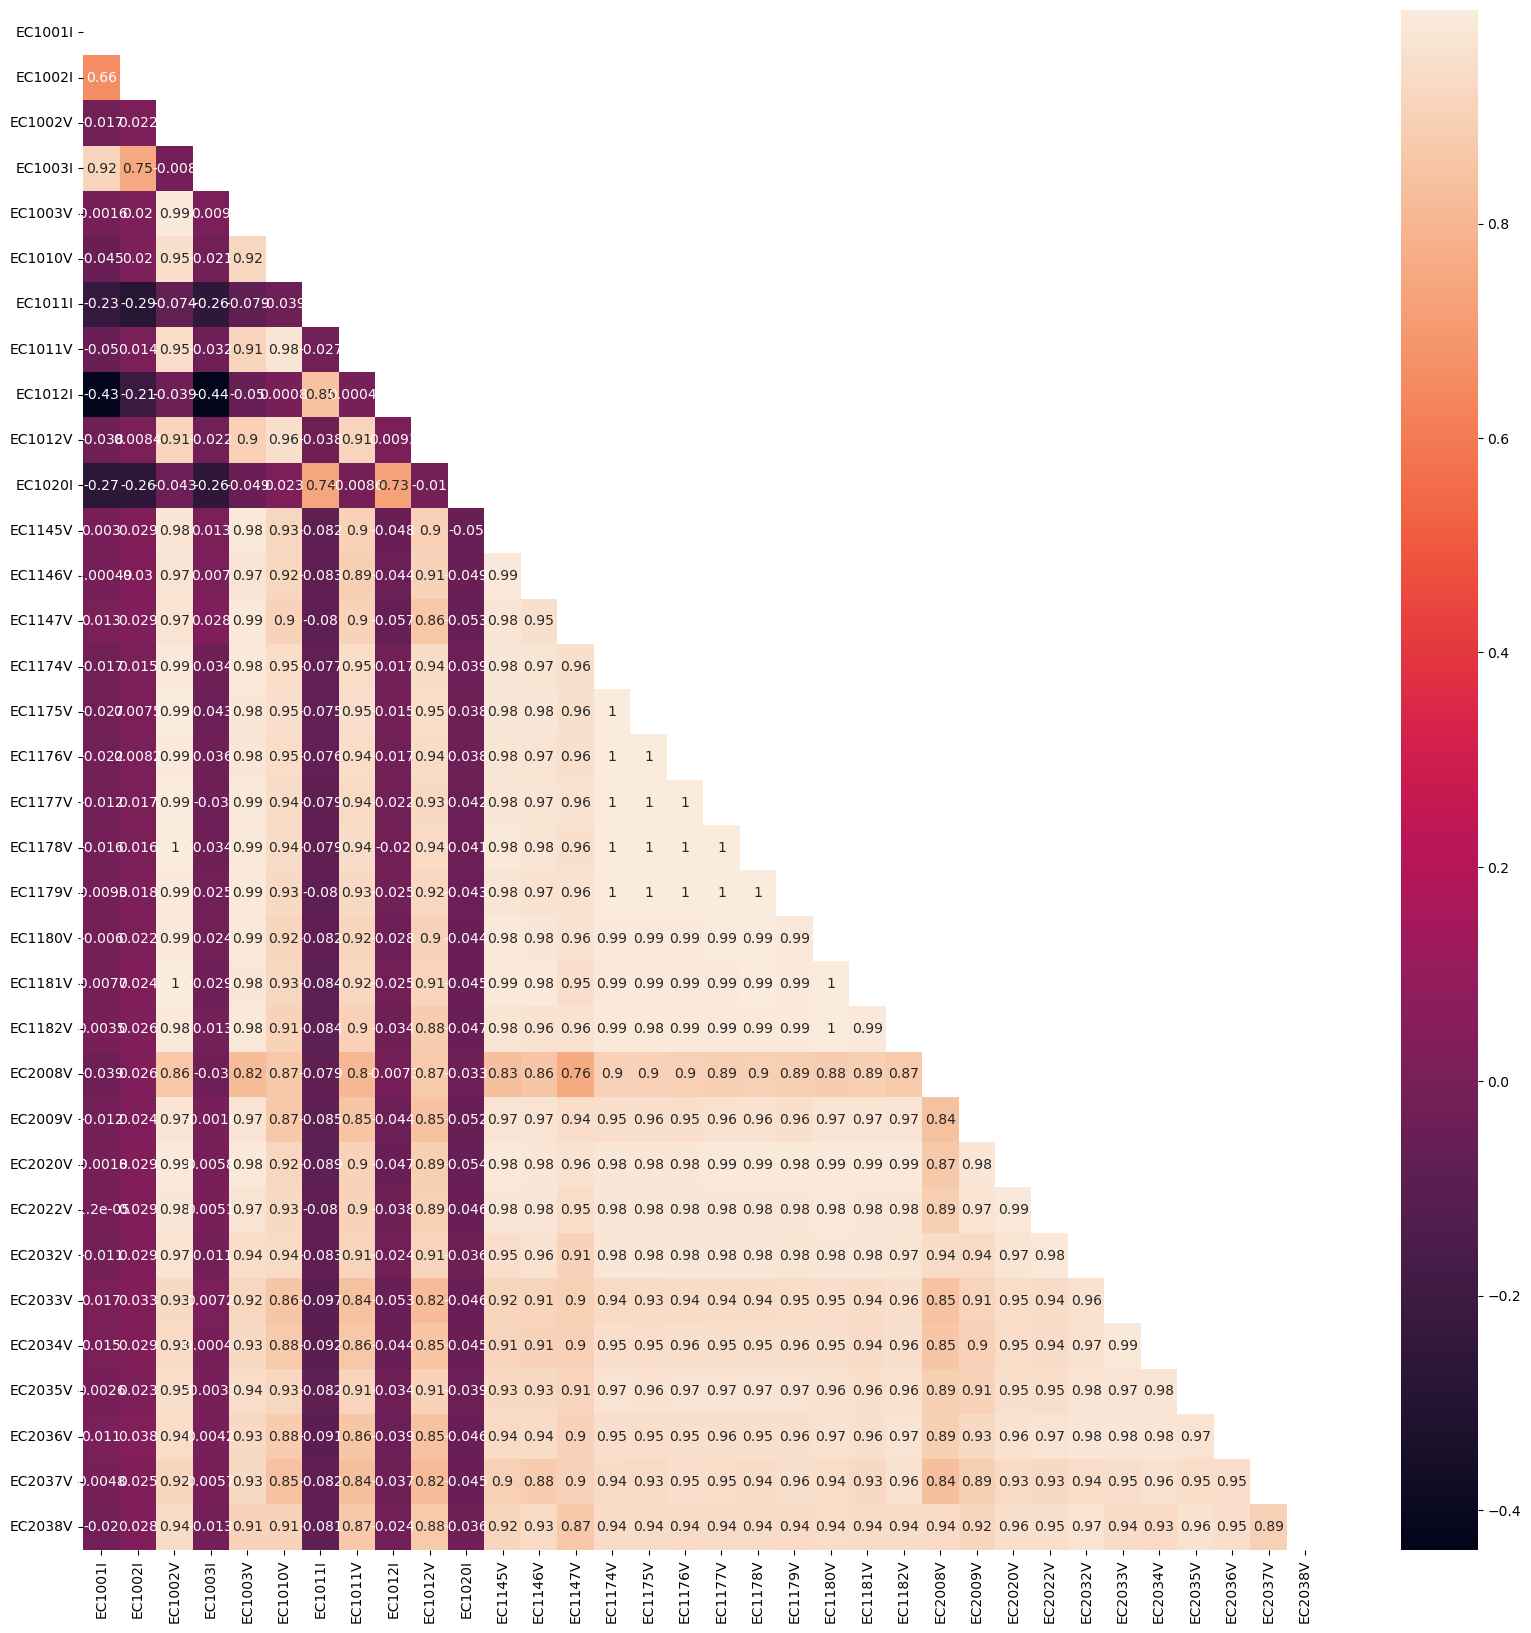

In [17]:
df=result_df.drop(columns=['cities','TIME_PERIOD'])
#Check correlation for each feature agaisnt each other
correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [16]:
print(correlations_matrix)

          EC1001I   EC1002I   EC1002V   EC1003I   EC1003V   EC1010V   EC1011I  \
EC1001I  1.000000  0.661246 -0.016997  0.919224 -0.001604 -0.045056 -0.232982   
EC1002I  0.661246  1.000000  0.022381  0.748775  0.020344  0.019991 -0.288100   
EC1002V -0.016997  0.022381  1.000000 -0.007974  0.987902  0.953631 -0.074228   
EC1003I  0.919224  0.748775 -0.007974  1.000000  0.008974 -0.021394 -0.260246   
EC1003V -0.001604  0.020344  0.987902  0.008974  1.000000  0.924478 -0.079067   
EC1010V -0.045056  0.019991  0.953631 -0.021394  0.924478  1.000000 -0.038547   
EC1011I -0.232982 -0.288100 -0.074228 -0.260246 -0.079067 -0.038547  1.000000   
EC1011V -0.050445  0.013624  0.946437 -0.031694  0.913906  0.975590 -0.026964   
EC1012I -0.425081 -0.214138 -0.038526 -0.437031 -0.050394  0.000795  0.845141   
EC1012V -0.037972  0.008368  0.911865 -0.022360  0.897615  0.960227 -0.038489   
EC1020I -0.270686 -0.263626 -0.043298 -0.255932 -0.049321  0.022769  0.742086   
EC1145V  0.002957  0.029287 

In [19]:
#from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [21]:
#Function to replace nan with mean in each column
def replace_nan_with_mean(df):
    # Calculate the mean of each column
    column_means = df.mean()

    # Replace NaN values with column means
    df_filled = df.fillna(column_means)

    return df_filled

In [23]:
result_df=replace_nan_with_mean(result_df)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_16732\3937180532.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column_means = df.mean()


In [24]:
X=result_df.drop(columns=['cities','TIME_PERIOD'])
y=result_df[['EC1011I']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9991848476445025

In [25]:
importances = zip(X.columns, model.feature_importances_)

dict(sorted(importances, key=lambda x: x[1], reverse=True))

{'EC1011I': 0.9996115688793903,
 'EC1011V': 0.00015464753790991398,
 'EC1180V': 0.00014679434262542473,
 'EC2038V': 4.349462003717524e-05,
 'EC1179V': 2.174731001858762e-05,
 'EC1010V': 2.1747310018581407e-05,
 'EC1001I': 0.0,
 'EC1002I': 0.0,
 'EC1002V': 0.0,
 'EC1003I': 0.0,
 'EC1003V': 0.0,
 'EC1012I': 0.0,
 'EC1012V': 0.0,
 'EC1020I': 0.0,
 'EC1145V': 0.0,
 'EC1146V': 0.0,
 'EC1147V': 0.0,
 'EC1174V': 0.0,
 'EC1175V': 0.0,
 'EC1176V': 0.0,
 'EC1177V': 0.0,
 'EC1178V': 0.0,
 'EC1181V': 0.0,
 'EC1182V': 0.0,
 'EC2008V': 0.0,
 'EC2009V': 0.0,
 'EC2020V': 0.0,
 'EC2022V': 0.0,
 'EC2032V': 0.0,
 'EC2033V': 0.0,
 'EC2034V': 0.0,
 'EC2035V': 0.0,
 'EC2036V': 0.0,
 'EC2037V': 0.0}